In [5]:
# FORMULA FOR MULTI LINEAR REGRESSION     y = m1x1 + m2x2 + m3x3 + .................. + mnxn + c

In [6]:
import pandas as pd

In [7]:

df = pd.read_csv("/content/CarPrice_Assignment (2).csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [9]:
df = df.drop(['car_ID','symboling','wheelbase','compressionratio','curbweight','boreratio','peakrpm','citympg','highwaympg'],axis=1) #drop unwanted columns
df

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carwidth,carheight,enginetype,cylindernumber,enginesize,fuelsystem,stroke,horsepower,price
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,168.8,64.1,48.8,dohc,four,130,mpfi,2.68,111,13495.0
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,168.8,64.1,48.8,dohc,four,130,mpfi,2.68,111,16500.0
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,171.2,65.5,52.4,ohcv,six,152,mpfi,3.47,154,16500.0
3,audi 100 ls,gas,std,four,sedan,fwd,front,176.6,66.2,54.3,ohc,four,109,mpfi,3.40,102,13950.0
4,audi 100ls,gas,std,four,sedan,4wd,front,176.6,66.4,54.3,ohc,five,136,mpfi,3.40,115,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,188.8,68.9,55.5,ohc,four,141,mpfi,3.15,114,16845.0
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,188.8,68.8,55.5,ohc,four,141,mpfi,3.15,160,19045.0
202,volvo 244dl,gas,std,four,sedan,rwd,front,188.8,68.9,55.5,ohcv,six,173,mpfi,2.87,134,21485.0
203,volvo 246,diesel,turbo,four,sedan,rwd,front,188.8,68.9,55.5,ohc,six,145,idi,3.40,106,22470.0


In [10]:
# selecting the datatypes for doing linear regression
cars_numeric = df.select_dtypes(include=['int64','float64'])
cars_numeric  #data cleaning

,carlength,carwidth,carheight,enginesize,stroke,horsepower,price
0,168.8,64.1,48.8,130,2.68,111,13495.0
1,168.8,64.1,48.8,130,2.68,111,16500.0
2,171.2,65.5,52.4,152,3.47,154,16500.0
3,176.6,66.2,54.3,109,3.40,102,13950.0
4,176.6,66.4,54.3,136,3.40,115,17450.0
...,...,...,...,...,...,...,...
200,188.8,68.9,55.5,141,3.15,114,16845.0
201,188.8,68.8,55.5,141,3.15,160,19045.0
202,188.8,68.9,55.5,173,2.87,134,21485.0
203,188.8,68.9,55.5,145,3.40,106,22470.0


In [11]:
x = cars_numeric.iloc[:,0:6].values

y = cars_numeric.iloc[:,-1].values
# y = df['price'].values


# x = 205 rows,6columns
# y = 205 rows,1 column

In [12]:
from sklearn.model_selection import train_test_split   #(80%:20% split)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)             #,test_size=0.2)

In [13]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(164, 6)
(41, 6)
(164,)
(41,)


In [14]:
0.80*205

164.0

In [15]:
0.20*205

41.0

In [16]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression()

In [17]:
model.fit(x_train,y_train)

LinearRegression()

In [18]:
y_pred = model.predict(x_test)
y_pred   #predicted output 

array([ 7001.76804147,  9054.43111316, 22918.23144669,  7148.32547524,
        7746.34018548,  8673.37683712,  6936.26398085,  7432.94031083,
       16690.19002073,  9456.52938474, 16837.11866535, 10516.31631608,
        9173.1373129 ,  6608.01383106, 29586.06862044, 10495.96197306,
        7031.15102677, 26238.84858827, 10719.84554425,  7243.22597371,
        7057.53044034, 38600.69534887, 22028.14297839, 11791.52951934,
       16445.49786495, 21976.29560802, 16779.20198173,  7619.45534313,
       10675.63888102, 19017.92959182, 20536.7448894 , 22310.58966122,
        8608.13894546, 19529.32771749, 16844.27692792,  6588.43938922,
        7524.16131861, 10475.81830079,  7432.94031083, 38712.27384562,
        6976.57603696])

In [19]:
y_test  #actual output 

array([ 7499. ,  5118. , 31600. ,  7295. ,  6938. ,  7957. ,  6338. ,
        6095. , 12964. ,  8499. , 15580. , 11595. ,  8845. , 10295. ,
       35056. ,  8195. , 10945. , 41315. ,  7775. ,  6855. ,  8058. ,
       31400.5, 14399. ,  9295. , 12940. , 16503. , 12629. ,  6918. ,
        7603. , 18420. , 23875. , 18399. ,  8558. , 15750. , 21105. ,
        6189. ,  6529. ,  9959. ,  5195. , 45400. ,  7788. ])

In [20]:
len(y_pred)

41

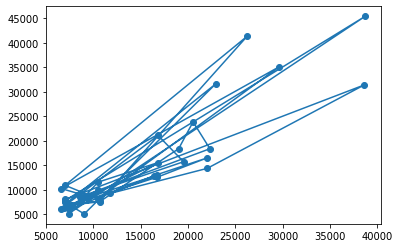

In [21]:
import matplotlib.pyplot as plt
plt.scatter(y_pred,y_test)
plt.plot(y_pred,y_test)
# more than one line , linear regression plot not possible using matplotlib

In [22]:
# pandas plotting can be used to compare
df1 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df1

,Actual,Predicted
0,7499.0,7001.768041
1,5118.0,9054.431113
2,31600.0,22918.231447
3,7295.0,7148.325475
4,6938.0,7746.340185
5,7957.0,8673.376837
6,6338.0,6936.263981
7,6095.0,7432.940311
8,12964.0,16690.190021
9,8499.0,9456.529385


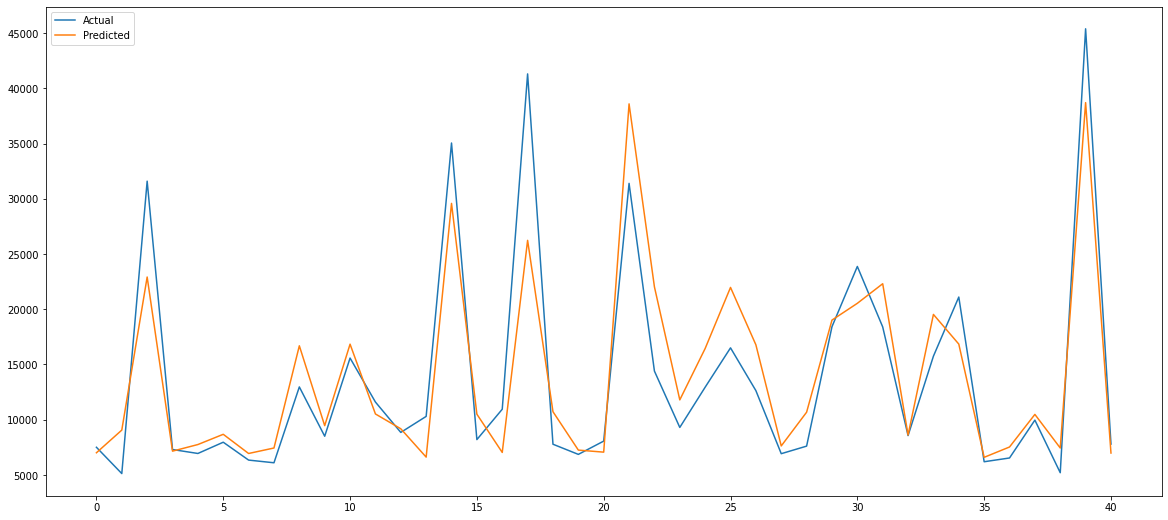

In [23]:
df1.plot(figsize=(20,9))

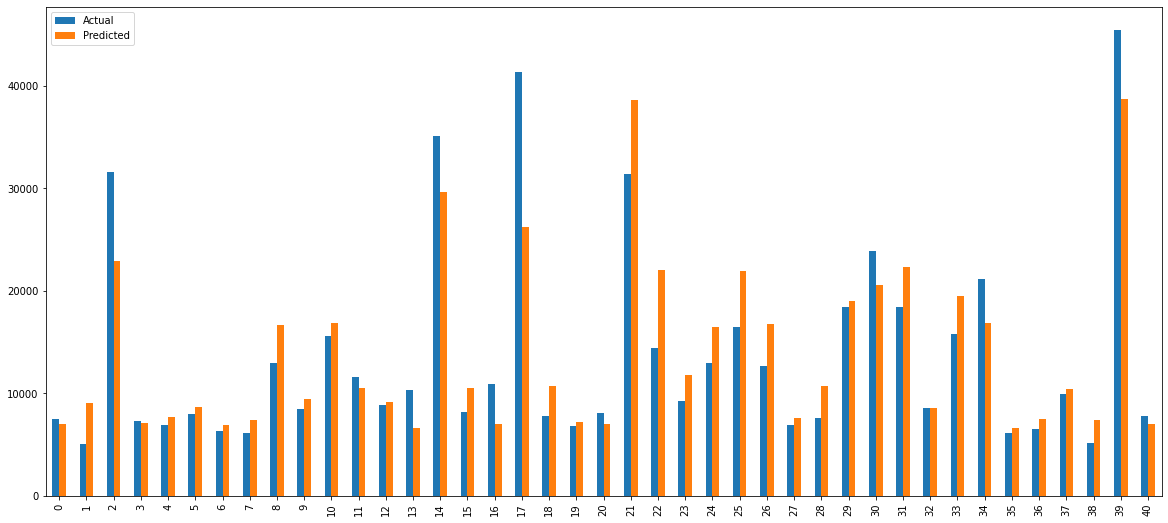

In [24]:
df1.plot(figsize=(20,9),kind = 'bar')

In [25]:
from sklearn.metrics import r2_score 
r2_score(y_test,y_pred)

0.8224175949535469

In [26]:
#  r2_scores fortest and train sizes 

# 80:20  = 0.8224175949535469

In [27]:
cars_numeric.head()

,carlength,carwidth,carheight,enginesize,stroke,horsepower,price
0,168.8,64.1,48.8,130,2.68,111,13495.0
1,168.8,64.1,48.8,130,2.68,111,16500.0
2,171.2,65.5,52.4,152,3.47,154,16500.0
3,176.6,66.2,54.3,109,3.40,102,13950.0
4,176.6,66.4,54.3,136,3.40,115,17450.0


In [28]:
model.predict([[190.9,70.3,54.9,183,3.64,123]])

array([22000.79105995])

In [29]:
# 1. Serialization step creates the file
import pickle
pickle.dump(model,open('cars.pkl','wb'))

In [30]:
# 2. Deserialization step 
# Reloading of the model back
import pickle 
reload_model = pickle.load(open('cars.pkl','rb'))

In [31]:
reload_model.predict([[190.9,70.3,54.9,183,3.64,123]])

array([22000.79105995])

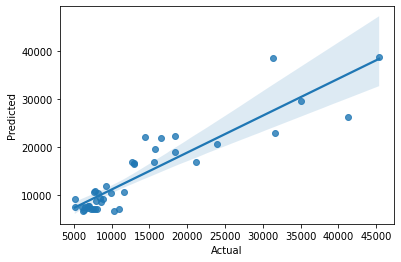

In [32]:
import seaborn  
seaborn.regplot(x='Actual',y='Predicted',data=df1)

In [33]:
# label encoding 